In [1]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json -O /tmp/sarcasm.json


--2020-05-27 18:45:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c15::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-05-27 18:45:17 (135 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
import json
with open('/tmp/sarcasm.json','r') as f:
  datastore=json.load(f)

In [0]:
vocab_size=1000
embedding_dim=16
max_length=16
trun_type='post'
padding_type='post'
oov_tok='<OOV>'
training_size=20000

In [0]:
sentences=[]
labels=[]
urls=[]

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [0]:
training_sentences=sentences[0:training_size]
training_labels=labels[0:training_size]

testing_sentences=sentences[training_size:]
testing_labels=labels[training_size:]

In [0]:
import numpy as np

training_labels_final=np.array(training_labels)
testing_labels_final=np.array(testing_labels)

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index

sequences=tokenizer.texts_to_sequences(training_sentences)
padded=pad_sequences(sequences,maxlen=max_length,padding=padding_type,truncating=trun_type)

print(len(word_index))

25637


In [0]:
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type,truncating=trun_type)

In [18]:
import tensorflow as tf

model=tf.keras.Sequential([
                                   tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(24,activation='relu'),
                                   tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 16, 16)            16000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                6168      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 22,193
Trainable params: 22,193
Non-trainable params: 0
_________________________________________________________________


In [19]:
num_epochs = 30
history=model.fit(padded,training_labels_final,epochs=num_epochs,validation_data=(testing_padded,testing_labels_final),verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.4611 - accuracy: 0.7644 - val_loss: 0.3753 - val_accuracy: 0.8272
Epoch 2/30
625/625 - 1s - loss: 0.3247 - accuracy: 0.8533 - val_loss: 0.3621 - val_accuracy: 0.8329
Epoch 3/30
625/625 - 1s - loss: 0.2877 - accuracy: 0.8727 - val_loss: 0.3767 - val_accuracy: 0.8304
Epoch 4/30
625/625 - 1s - loss: 0.2597 - accuracy: 0.8865 - val_loss: 0.3918 - val_accuracy: 0.8216
Epoch 5/30
625/625 - 1s - loss: 0.2318 - accuracy: 0.9032 - val_loss: 0.4234 - val_accuracy: 0.8182
Epoch 6/30
625/625 - 1s - loss: 0.2054 - accuracy: 0.9140 - val_loss: 0.4571 - val_accuracy: 0.8140
Epoch 7/30
625/625 - 1s - loss: 0.1820 - accuracy: 0.9251 - val_loss: 0.5024 - val_accuracy: 0.8080
Epoch 8/30
625/625 - 1s - loss: 0.1604 - accuracy: 0.9388 - val_loss: 0.5493 - val_accuracy: 0.8004
Epoch 9/30
625/625 - 1s - loss: 0.1461 - accuracy: 0.9427 - val_loss: 0.6066 - val_accuracy: 0.7951
Epoch 10/30
625/625 - 1s - loss: 0.1317 - accuracy: 0.9506 - val_loss: 0.6683 - val_accuracy: 0.7936

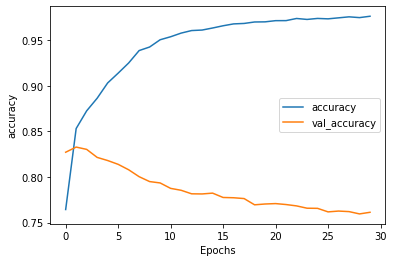

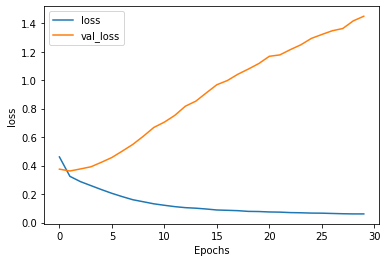

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')